In [1]:
# Initial imports
import pandas as pd
from sklearn.cluster import KMeans

## Loading Cleaned Shopping Data into Pandas

In [10]:
# Loading data into Pandas
df_shopping = pd.read_csv("Mall_Customers.csv")
df_shopping.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Implementing the Elbow Method

In [11]:
# Create an empty list to store the inertia values
inertia = []

# Create a list with the number of k-values to try
k = list(range(1, 11))

In [12]:
def encodeCard(genre):
    """
    This function encodes a card type by setting credit card purchases to 1 and debit cards to 0.
    """
    if genre.lower() == "male":
        return 1
    else:
        return 0

In [13]:
# Edit the `Card Type` column using the encodeCard function
df_shopping["Genre"] = df_shopping["Genre"].apply(encodeCard)

# Review the DataFrame
df_shopping.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [14]:
# Create a for loop to compute the inertia with each possible value of k and add the values to the inertia list.
for i in k:
    model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    model.fit(df_shopping)
    inertia.append(model.inertia_)

In [15]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow

,k,inertia
0,1,975512.060000
1,2,387065.713771
2,3,271594.461295
3,4,195418.686699
4,5,158165.840768
5,6,122637.557961
6,7,106304.529108
7,8,95321.912688
8,9,77577.681201
9,10,73948.823090


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

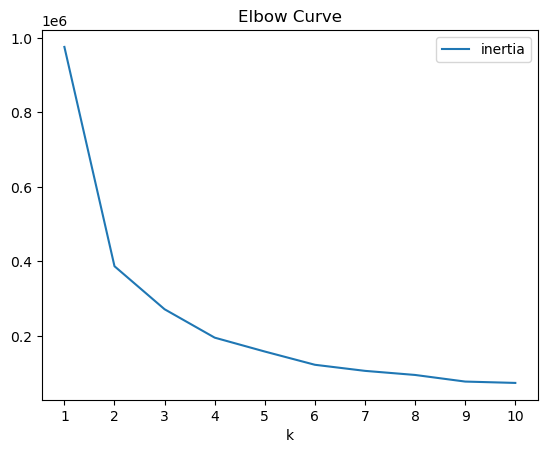

In [16]:
# Plot the Elbow curve
df_elbow.plot.line(x="k",
                   y="inertia",
                   title="Elbow Curve",
                   xticks=k)

In [17]:
# Determine the rate of decrease between each k value. 
k = elbow_data["k"]
inertia = elbow_data["inertia"]
for i in range(1, len(k)):
    percentage_decrease = (inertia[i-1] - inertia[i]) / inertia[i-1] * 100
    print(f"Percentage decrease from k={k[i-1]} to k={k[i]}: {percentage_decrease:.2f}%")
    

Percentage decrease from k=1 to k=2: 60.32%
Percentage decrease from k=2 to k=3: 29.83%
Percentage decrease from k=3 to k=4: 28.05%
Percentage decrease from k=4 to k=5: 19.06%
Percentage decrease from k=5 to k=6: 22.46%
Percentage decrease from k=6 to k=7: 13.32%
Percentage decrease from k=7 to k=8: 10.33%
Percentage decrease from k=8 to k=9: 18.62%
Percentage decrease from k=9 to k=10: 4.68%


 The rate of decrease in inertia slows down considerably from k=2 to k=3, which means that our elbow point is at k=3.